# KMeans Clustering

**Goal**: KMeans is an unsupervised learning algorithm that partitions data into $k$ clusters by minimizing the within-cluster sum of squares.

**Use Cases**:
- Customer segmentation
- Image compression
- Market basket analysis
- Pattern recognition

**Steps of KMeans**:
1. Initialize $k$ centroids randomly
2. Assign each point to the nearest centroid
3. Recompute centroids as the mean of assigned points
4. Repeat steps 2–3 until convergence

**Key Concepts**:
- Inertia (within-cluster sum of squared distances)
- Elbow Method
- Initialization strategies (random, k-means++)
- Convergence criteria
- Limitations (spherical assumption, fixed k)


## Introduction to KMeans

KMeans is a centroid-based clustering algorithm that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean.

Given data matrix $X \in \mathbb{R}^{n \times d}$ and a desired number of clusters $k$, the algorithm minimizes the following objective function:

$$
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

where:
- $C_i$ is the set of points assigned to cluster $i$
- $\mu_i$ is the centroid (mean) of cluster $i$

### Algorithm Steps:
1. **Initialization**: Choose $k$ initial centroids $\mu_1, \mu_2, ..., \mu_k$ (random or k-means++)
2. **Assignment**: For each point $x_j$, assign to the closest centroid:
   $$ \text{assign}(x_j) = \arg \min_i \| x_j - \mu_i \|^2 $$
3. **Update**: For each cluster $i$, update the centroid:
   $$ \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j $$
4. **Convergence**: Repeat steps 2–3 until centroids stop changing significantly or max iterations reached.

### Limitations:
- Assumes isotropic (spherical) clusters
- Requires predefined $k$
- Sensitive to initialization and outliers


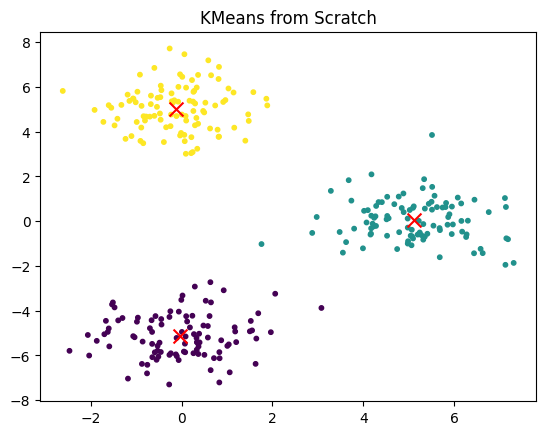

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([0, 5])
X2 = np.random.randn(100, 2) + np.array([5, 0])
X3 = np.random.randn(100, 2) + np.array([0, -5])
X = np.vstack([X1, X2, X3])

# KMeans from scratch
def kmeans(X, k=3, max_iters=100):
    np.random.seed(0)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels

centroids, labels = kmeans(X, k=3)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')
plt.title("KMeans from Scratch")
plt.show()

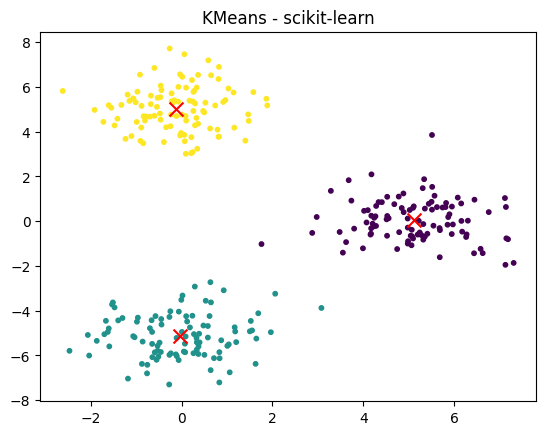

Inertia: 561.1757998724386


In [2]:
from sklearn.cluster import KMeans

# Fit model
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')
plt.title("KMeans - scikit-learn")
plt.show()

# Inertia (sum of squared distances to closest cluster center)
print("Inertia:", kmeans_model.inertia_)


## Choosing the Right Number of Clusters

### 1. Elbow Method
This method evaluates the "inertia" (sum of squared distances of samples to their closest cluster center) for different values of $k$ and looks for the "elbow point" where adding more clusters doesn't give significant improvement.

Steps:
- Fit KMeans with different $k$ values
- Plot $k$ vs. inertia
- The "elbow" is the point of diminishing returns

### 2. Silhouette Score
Silhouette score measures how similar a sample is to its own cluster compared to other clusters:
$$ s = \frac{b - a}{\max(a, b)} $$
where:
- $a$ is the average distance to other points in the same cluster
- $b$ is the average distance to points in the nearest other cluster

$s$ ranges from -1 to 1. Higher is better.


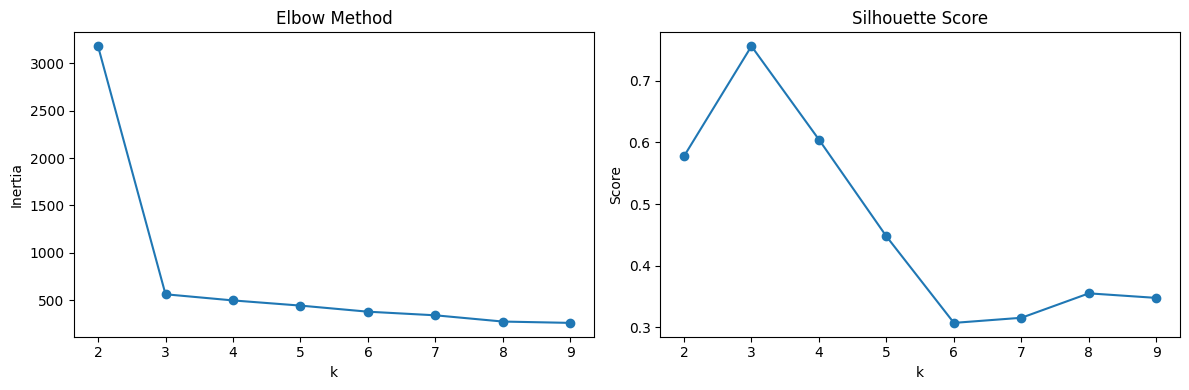

In [3]:
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Plot Inertia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

# Plot Silhouette
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


## Comparing KMeans with DBSCAN and Hierarchical Clustering

### KMeans:
- Assumes spherical, equally sized clusters
- Sensitive to initial centroids and outliers
- Requires pre-specified $k$

### DBSCAN (Density-Based Spatial Clustering):
- Groups together points that are closely packed (dense regions)
- Can find clusters of arbitrary shape
- Does not require $k$, but needs `eps` and `min_samples`
- Robust to noise

### Hierarchical Clustering:
- Builds a hierarchy of clusters using agglomerative (bottom-up) or divisive (top-down) approach
- Dendrogram visualizes cluster merges
- No need to fix $k$ beforehand (can cut tree at any height)

Each method has strengths depending on:
- The shape of clusters
- The presence of noise
- Whether $k$ is known in advance


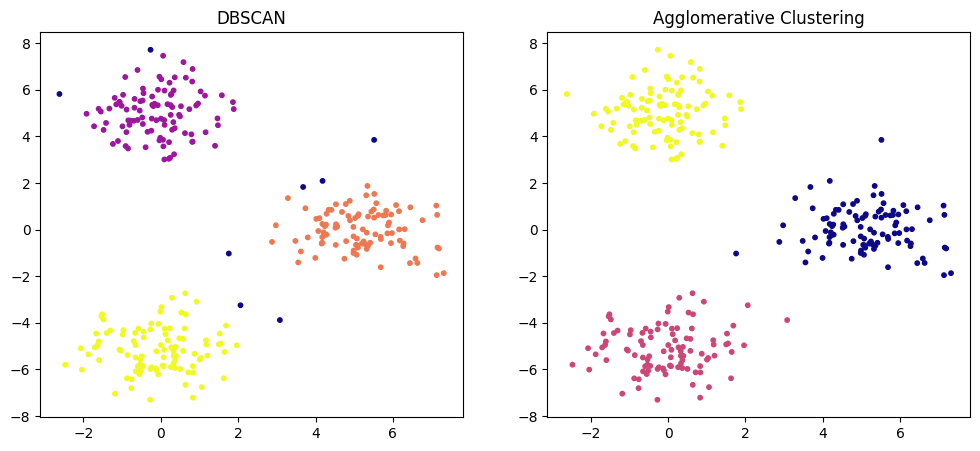

In [4]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# DBSCAN
db = DBSCAN(eps=0.9, min_samples=5)
db_labels = db.fit_predict(X)

# Hierarchical (Agglomerative)
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)

# Plot comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=db_labels, cmap='plasma', s=10)
axs[0].set_title("DBSCAN")
axs[1].scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='plasma', s=10)
axs[1].set_title("Agglomerative Clustering")
plt.show()


## Updated Topics for Further Exploration

1. KMeans++ Initialization Strategy
2. MiniBatchKMeans for Large Datasets
3. PCA Before Clustering — Pipeline Integration
4. Gaussian Mixture Models (GMM) as a Soft Clustering Alternative
5. Cluster Evaluation Metrics (Davies-Bouldin, Calinski-Harabasz)
6. Visualizing Clusters in High-Dimensional Space with t-SNE or UMAP
7. Advanced Density-Based Clustering (HDBSCAN)
